---
# Übungszettel 7, Python Aufgabe
---

**ausgegeben am Mi 3.6.2020 12 Uhr, abzugeben bis Mi 10.6.2020 12 Uhr**

Bearbeitet von: Justus Multhaup

Zusammenarbeit mit: 

Übungsgruppe: Laura Strampe

---

**Einführung**: Auf dem letzten Übungszettel und in den Vorlesungsexperimenten haben Sie bereits die Ablenkung geladener Teilchem im Feld eines Sektormagneten kennen gelernt. Hier wollen wir dieses Thema noch einmal aufgreifen und die weiteren Effekte solcher Ablenkungen beschreiben.

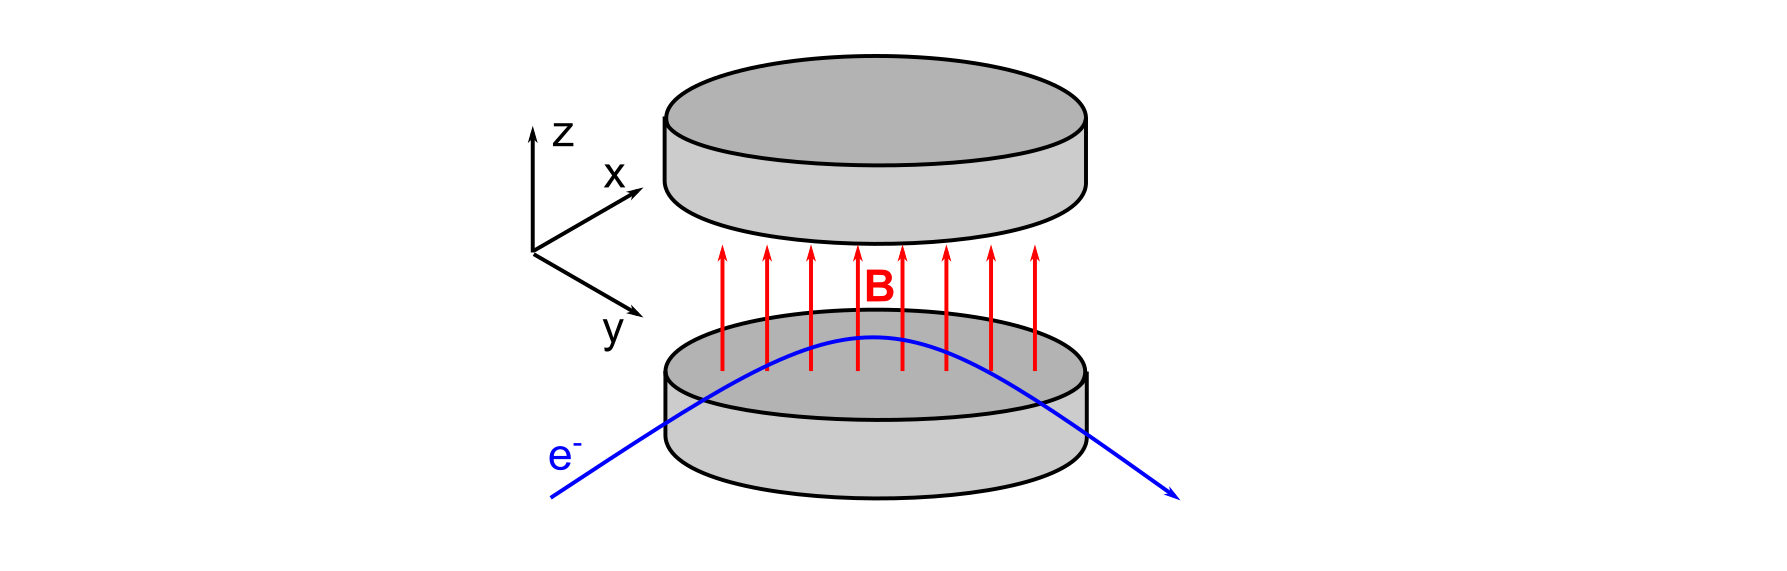

Ziel der Aufgabe ist es, die Lorentz-Kraft und die Ablenkung im Magnetfeld noch einmal zu behandeln, sowie `numpy.solve_ivp` noch einmal unter Verwendung der Integrations-Toleranzen zu verwenden.

**Aufgabe**: Berechnen Sie die Bahnen für 1 MeV Elektronen im Feld eines Magneten für leicht verschiedene Anfangsorte und betrachten Sie die resultierenden Trajektorien. Vernachlässigen Sie dabei relativistische Effekte.

1. Betrachten Sie Bewegungsgleichung und Implementieren Sie die Zeitableitungen der Orte und Geschwindigkeiten mit Hilfe der Lorentz-Kraft (z.B. analog zu Python Aufgabe 3). Das Magnetfeld sei dabei $\vec{B}\left(\vec{r}\right)=\left(\begin{array}{c}
0\\
0\\
0.0043
\end{array}\right)\exp\left(-R^{2}\right)$ Tesla mit $R=\frac{\left|\vec{r}\right|}{1\:\textrm{m}}$ und die Lorenz-Kraft $\vec{F}\left(\vec{r}\right)=q\cdot\vec{v}\times\vec{B}\left(\vec{r}\right)$.

2. Schreiben Sie eine Funktion die die Trajektorie mit Hilfe von `scipy.integrate.solve_ivp` eines Elektrons unter Angabe der Anfangsbedingungen berechnet und die $x-$ und $y-$ Komponente der Orte der Trajektorie zurück gibt. Nutzen Sie dabei die optionalen Argumente `rtol` und `atol` von `solve_ivp` um die Integrationsgenauigkeit zu Ihrer Zufriedenheit anzupassen.

3. Plotten Sie die Trajektorien von 1 MeV Elektronen, die bei $x = -2$ m und $y = -0.1 ... 0.1$ m in positive $x-$Richtung fliegend starten. 

4. Beschreiben Sie was mit den Trajektorien nach dem Austritt aus dem Magnetfeld passiert. Machen Sie einen Vorschlag um den ungewünschten Effekten entgegen zu wirken.

**Vorgehensweise**: Die Aufgabe folgt weitestgehend der Pythonaufgabe von Übungsblatt 3. Wir empfehlen folgende Vorgehensweise, der Sie jedoch nicht folgen müssen:

1. Schreiben Sie eine Funktion `F_Lorentz(x)`, die mit Hilfe des Vektors `x` die Lorentzkraft berechnet. `x` hat dabei 6 Komponenten, die drei Ortskoordinaten und die drei Geschwindigkeitskoordinaten. Um $R$ zu berechnen können Sie `numpy.linalg.norm(x[:3])` nutzen. Importieren Sie benötigte Konstanten aus `scipy.constants`.

2. Schreiben Sie eine Funktion `f(t,x)`, die die Zeitableitungen der Orte und Geschwindigkeiten (genauer: des Vektors `x`) berechnet. Orientieren Sie sich dabei an der Python-Aufgabe 3.

3. Schreiben Sie eine Funktion `traj(x0)`, welche die Tajektorien mit Hilfe von `scipy.integrate.solve_ivp` berechnet. Die Funktion soll die $x-$ und $y-$ Komponente der Orte der Trajektorie zurück geben. Wählen Sie eine Integrations-Endzeit, die ausreicht um zwei Meter oder so wieder aus dem Magnetfeld zu kommen (das Magnetfeld ist nur etwa 1 m um den Ursprung ausgedehnt).

4. Nutzen sie `traj(x0)` und plotten Sie z.B. 10 Tajektorien mit unterschiedlichen Startwerten für die $y-$Koordinate mit Hilfe einer Schleife.

5. Passen Sie die optionalen Argumente `rtol` und `atol` von `solve_ivp` um die Integrationsgenauigkeit zu Ihrer Zufriedenheit anzupassen.

6. Beantworten Sie Frage 4.

**Hilfestellung**: `rtol` und `atol` beschreiben die relative Toleranz und absolute Toleranz von `x`, die während der Integration noch zulässig ist. Wenn Sie diese Werte anpassen, passen Sie auch die dynamische Wahl der Integrationsschrittweiten an. Wählen Sie paar große und sehr kleine Werte und beobachten Sie, ab wann sich die Trajektorien nicht mehr ändern.

---
**Erste Hilfe Python:**
* Online-Sprechstunde jeden Montag und Freitag im Semester von 16-17 Uhr über BigBlueButton
* Studiengruppe im StudIP mit dem Titel “Erste Hilfe Python der SUB Göttingen”
* Übersichts-Pad ( https://pad.gwdg.de/ErsteHilfePython ) als alternative Anlaufstelle

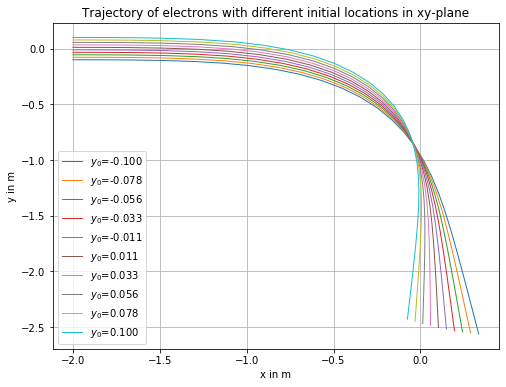

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import electron_mass as e_m,elementary_charge as e_c
from scipy.integrate import solve_ivp

##beschleunigungsspannung
dU = 1e6

##Lorentzkraft
def F_Lorentz(x):
    R = np.linalg.norm(x[:3])
    B = [0,0,0.0043*np.exp(-R**2)]
    return e_c * np.cross(x[3:],B) # eigentlich -e_c, Elektronen sind negative geladen!


##Zeitableitungen

def f(t, x):
    rx = x[0]
    ry = x[1]
    rz = x[2]
    vx = x[3]
    vy = x[4]
    vz = x[5]
    return(vx, vy, vz, F_Lorentz(x)[0] / e_m, F_Lorentz(x)[1] / e_m, F_Lorentz(x)[2] / e_m)

def traj(x0):
    t_end = (2 - x0[0]) / x0[3]
    return solve_ivp(f,[0,t_end],x0,rtol = 10e-8,atol = 10e-8)




y0 = np.linspace(-0.1,0.1,10)

#plots
plt.figure(figsize = (8,6))
plt.title("Trajectory of electrons with different initial locations in xy-plane")
plt.ylabel("y in m")
plt.xlabel("x in m")
for i in range (len(y0)):
    x0 = np.array([-2, y0[i], 0, np.sqrt(2 * e_c * dU / e_m), 0, 0])
    plt.plot(traj(x0).y[0],traj(x0).y[1],linewidth = 1,label = "$y_0$=%1.3f"%y0[i])
    
    
plt.legend(loc = 'lower left')
plt.grid()    
plt.show()

In [45]:
"""
Nach Austritt aus dem Magnetfeld folgen die Elektronen aufgrund ihrer Trägheit einer linearen Trajektorie, die Ablenkung 
kann also als Streuung der Elektronen aufgefasst werden, wobei der Streuwinkel von dem y-Startwert abhängt.
"""

'\nNach Austritt aus dem Magnetfeld folgen die Elektronen einer linearen Trajektorie, die Ablenkung kann also als Streuung \nder Elektronen aufgefasst werden, wobei der Streuwinkel von dem y-Startwert abhängt.\n'